In [257]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sys import stdout
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error
%matplotlib notebook
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression,PLSSVD
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from scipy.ndimage import gaussian_filter
from tqdm import tqdm
from scipy import sparse
from scipy.io import loadmat
from scipy import signal
from tqdm import tqdm
from scipy import sparse
from scipy.signal import find_peaks, peak_prominences
from scipy.signal import chirp, find_peaks, peak_widths
from scipy.sparse.linalg import spsolve
from scipy.signal import argrelmax
from scipy.ndimage.filters import gaussian_filter1d
from scipy.sparse.linalg import spsolve
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [118]:
path = r'video_raw/best' # use your path
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df[300:1800])
frame = pd.concat(li, axis=1, ignore_index=True,sort=True)
frame.to_csv("video_raw/best/Combine/combined.csv", index=False, encoding='utf-8-sig')

In [ ]:
#data=frame
data = pd.read_csv('video_raw/naeem2/list.csv', delimiter = ",")

X = data.T
plt.plot(X)
plt.xlabel('Sampling Point')
plt.ylabel('Magnitude(AU)')
plt.show()

In [175]:
X = savgol_filter(X, 5, polyorder = 2,deriv=0)
# Plot second derivative
plt.figure(figsize=(8,5))
with plt.style.context(('ggplot')):
    plt.plot(X)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [50]:
import scipy.io
data1 = scipy.io.loadmat("data_mat/X.mat")
for i in data1:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("data_mat/x.csv"),data1[i],delimiter=',')

        
data2 = scipy.io.loadmat("data_mat/Y.mat")        
for j in data2:
    if '__' not in j and 'readme' not in j:
        np.savetxt(("data_mat/y.csv"),data2[j],delimiter=',')        

In [247]:
X = pd.read_csv('data_mat/x.csv')
y = pd.read_csv('data_mat/y.csv')

In [248]:
test=X.T
plt.plot(test)
plt.xlabel('Sampling Point')
plt.ylabel('Magnitude(AU)')
plt.show()

<IPython.core.display.Javascript object>


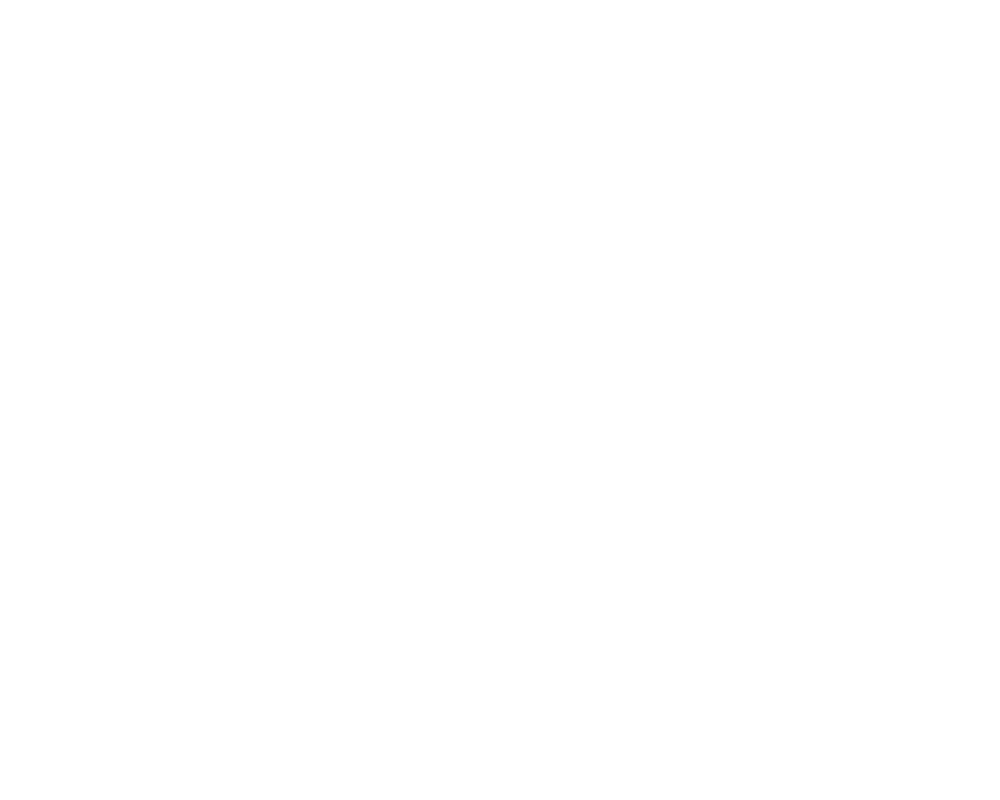

In [249]:
#Gausian
%matplotlib notebook
g_signal=gaussian_filter(test,sigma=0.5,cval=0.5, truncate=4.0)
plt.figure(figsize=(10,8))
plt.xlabel('Gausian+RAW PPG GRAPH')
plt.plot(g_signal)

In [250]:
#correcting baseline
def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.csc_matrix(np.diff(np.eye(L), 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

# Baseline Correction

<IPython.core.display.Javascript object>


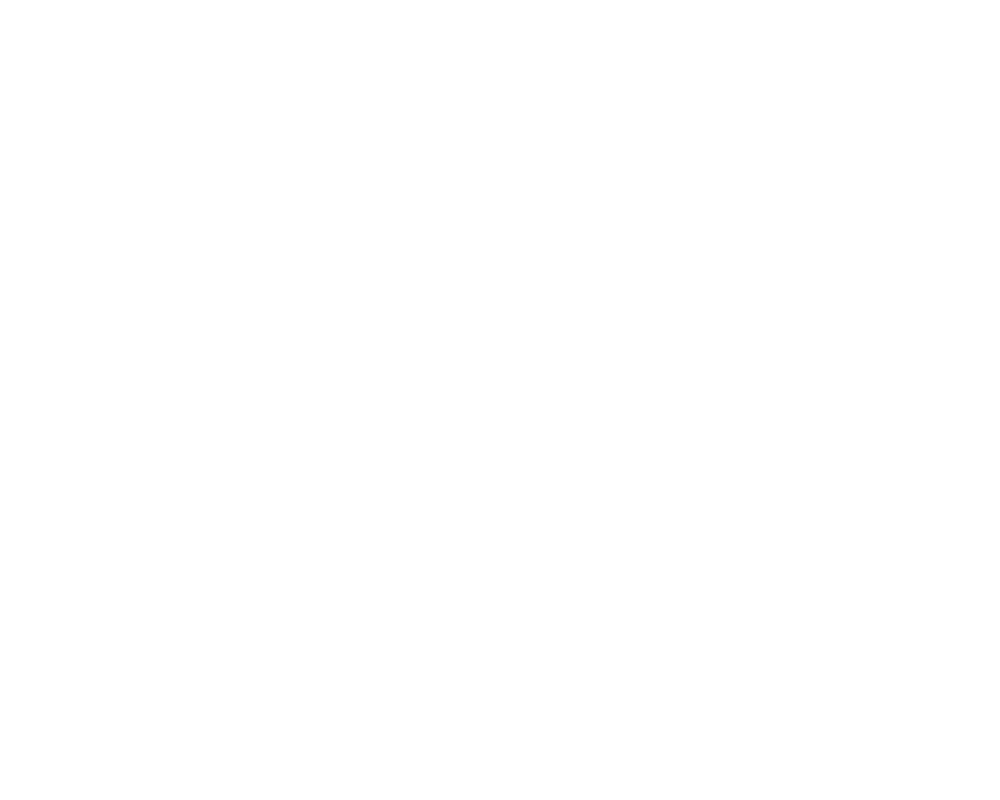

In [251]:
%matplotlib notebook
asx =[]
Corrected_base =[]
for i in range(len(g_signal)):
    asx.append(g_signal[i].flatten())
    base=asx[i]-baseline_als(asx[i], 1000, 0.05)
    Corrected_base.append(base)       
plt.figure(figsize=(10,8))
plt.xlabel('Corrected Baseline PPG GRAPH')
plt.plot(Corrected_base)

F:\Anaconda\envs\tensorflow\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


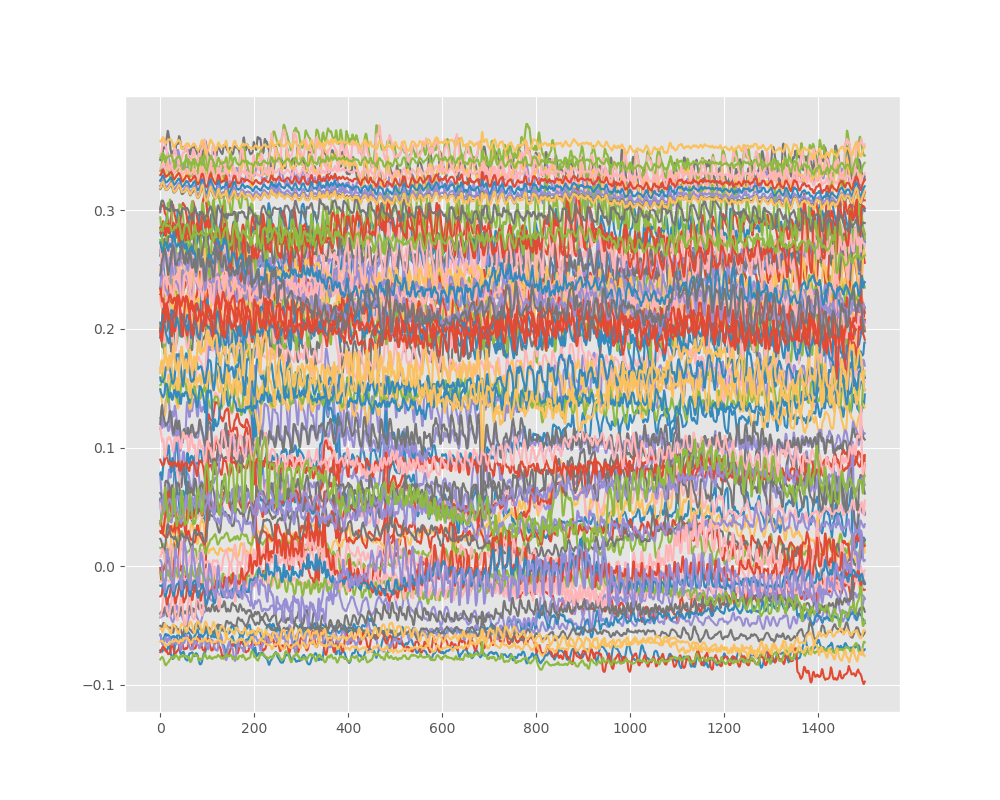

In [252]:
%matplotlib notebook
sig_filter = savgol_filter(Corrected_base, 5, polyorder = 2,deriv=0)
# Plot second derivative
plt.figure(figsize=(10,8))
with plt.style.context(('ggplot')):
    plt.plot(sig_filter)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [279]:
X=sig_filter.T

In [280]:
rmse_simple = np.zeros(30)
for nc in range(30):
    # Simple PLS
    pls_simple = PLSRegression(n_components=nc+1)
    # Fit
    pls_simple.fit(X, y)
    # Cross-validation
    y_cv = cross_val_predict(pls_simple, X, y, cv=10)
    # Calculate scores
    score = r2_score(y, y_cv)
    rmse_simple[nc] = np.sqrt(mean_squared_error(y, y_cv))
print("mean Square Error",np.min(rmse_simple))
print("Score",score)


mean Square Error 44.051709707533
Score -12.742246800779977


<IPython.core.display.Javascript object>


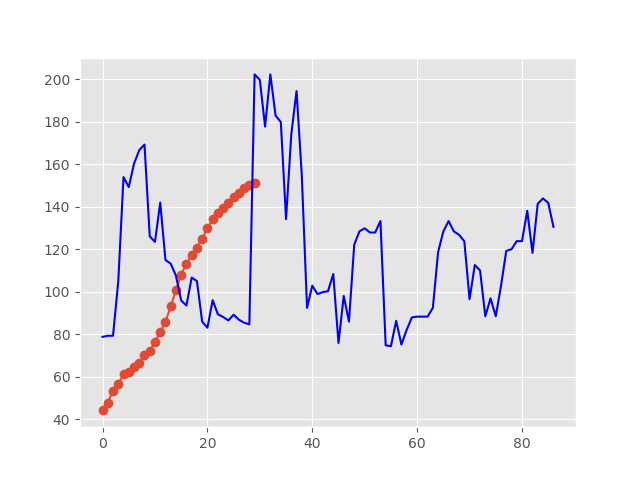

In [281]:
%matplotlib notebook
with plt.style.context(('ggplot')):
    plt.plot(rmse_simple, 'o-')
    plt.show()

1500

1500

In [385]:
testX=X
testX=np.array(testX)
y=np.array(y)

In [397]:
X.shape

(87, 1500)

In [399]:
y

array([[ 79.2],
       [ 79.2],
       [ 79.2],
       [ 79.2],
       [169.2],
       [169.2],
       [169.2],
       [169.2],
       [169.2],
       [122.4],
       [122.4],
       [122.4],
       [122.4],
       [122.4],
       [ 93.6],
       [ 93.6],
       [ 93.6],
       [ 93.6],
       [ 93.6],
       [ 81. ],
       [ 81. ],
       [ 81. ],
       [ 81. ],
       [ 81. ],
       [ 84.6],
       [ 84.6],
       [ 84.6],
       [ 84.6],
       [ 84.6],
       [210.6],
       [210.6],
       [210.6],
       [210.6],
       [210.6],
       [194.4],
       [194.4],
       [194.4],
       [194.4],
       [194.4],
       [100.8],
       [100.8],
       [100.8],
       [100.8],
       [100.8],
       [ 73.8],
       [ 73.8],
       [ 73.8],
       [ 73.8],
       [ 73.8],
       [127.8],
       [127.8],
       [127.8],
       [127.8],
       [127.8],
       [ 68.4],
       [ 68.4],
       [ 68.4],
       [ 68.4],
       [ 68.4],
       [ 88.2],
       [ 88.2],
       [ 88.2],
       [

In [386]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

trainingData    = np.array(testX)
trainingScores  = np.array(y)
predictionData  = np.array(testX)

for item in classifiers:
    print(item)
    clf = item
    clf.fit(trainingData, trainingScores)
    print(clf.predict(testX),'\n')
    

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


F:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[100.83829181 100.81626066 100.80728109 100.81729499 100.83337027
 100.83819776 100.82022374 100.81852604 100.79945945 100.77933056
 100.74751804 100.72987426 100.69291215 100.76299962 100.83292233
 100.85584781 100.85048441 100.83359812 100.78186337 100.72356707
 100.70484535 100.71894163 100.68674926 100.65346171 100.64065273
 100.6469399  100.63408324 100.63841528 100.68564573 100.70824542
 100.70735007 100.70217688 100.71928677 100.78175248 100.8409002
 100.85491512 100.85438517 100.85543159 100.82072093 100.72965518
 100.68118674 100.70751431 100.69248595 100.74732091 100.82789323
 100.85369219 100.85587692 100.85710707 100.84567707 100.81188792
 100.78388108 100.80223062 100.80027867 100.77314791 100.74329856
 100.74012646 100.73836622 100.74799305 100.72380622 100.67452932
 100.62716522 100.63912429 100.64700586 100.65265101 100.65759056
 100.66156677 100.66416236 100.66452025 100.6918951  100.72579424
 100.74306023 100.77223939 100.82400903 100.85165999 100.85397955
 100.846148

F:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
F:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 54.94661427  75.80208603  82.08613495  73.53259396  59.67304214
  56.80195974  73.52676514  75.74207558  86.80654317  96.08973748
 109.55382114 116.00485376 129.07580906 100.7208115   59.92621082
  31.46260372  40.48467083  58.61396538  90.91907038 115.55466727
 122.90577467 117.97974957 129.64667221 140.35964247 144.30106001
 141.18651159 144.65420236 143.37649142 128.58162871 121.01128296
 121.51681027 123.01883095 116.1350801   89.6572929   50.30383456
  29.97402641  37.00690837  38.65880762  68.26200946 111.42870636
 129.2533831  120.33842096 125.41082562 104.60598442  61.47054596
  35.66590667  32.70506708  29.2644416   46.12919128  73.56885816
  88.91857874  79.00932791  79.62160717  93.24255649 106.28660719
 107.39177945 108.252954   104.66835945 114.83984542 132.69693594
 148.30295845 144.47250562 141.92558491 140.10942931 138.5237932
 137.23060143 136.38517697 136.30565635 126.73046536 114.09072459
 107.5277114   95.82246861  68.0951968   40.83493708  33.48778352
  45.585121

F:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[120.32331112 118.82845715 118.27992823 118.63699126 119.54113886
 119.89838286 118.87190944 118.68374599 117.72927238 116.8888014
 115.74338962 115.17193874 114.05565836 116.33771306 119.63395825
 121.91041791 121.1753811  119.7142362  117.05916312 114.98853407
 114.4070738  114.82757837 113.86660876 112.94471854 112.61055387
 112.78919298 112.44619568 112.55939647 113.85334699 114.51862191
 114.48923156 114.34779883 114.86994393 117.04547565 120.25350235
 121.89768462 121.40875474 121.32848421 118.82105713 115.18666327
 113.70738155 114.46498319 114.03609113 115.77405898 119.32944221
 121.51992156 121.77503422 122.03370038 120.61697361 118.38164521
 117.11348393 117.91139136 117.83413732 116.71442863 115.64349355
 115.54612751 115.48545825 115.81096508 115.0069405  113.53702032
 112.24628694 112.56338534 112.77477965 112.92736446 113.06185532
 113.17084104 113.24204732 113.25124914 114.03491782 115.07371717
 115.63860209 116.65593182 118.95393418 121.12924847 121.66001631
 120.693851

F:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[120.4554699  117.60300202 117.39791885 120.11617003 122.63852562
 122.85511314 119.31386179 119.16401672 117.81895653 116.62811138
 114.91725458 113.65756814 111.23312996 114.86987285 120.99985409
 125.2763948  124.14846219 121.67675402 117.36835903 113.84437348
 112.80347141 113.53372199 111.96257615 110.55196465 109.90320362
 109.8788362  109.00984232 109.36388852 111.88963678 113.33094458
 113.61780229 112.93160443 113.48626135 117.39115944 123.08190155
 125.636281   125.20234712 125.78850601 120.924487   113.47513273
 110.57403887 112.5302707  111.56746601 114.37453401 120.79080133
 125.40791886 125.77505291 126.03887828 123.30308235 119.54188002
 117.68434649 119.16496049 118.81207635 117.09811785 115.3697363
 114.55684519 113.70076377 114.45122472 113.53513135 111.16987939
 108.96170123 109.51899166 109.89778835 110.18775081 110.45482813
 110.65711299 110.77214837 110.78223378 112.28728234 113.97628573
 115.1552574  117.18954743 121.35623988 124.55325573 125.23868934
 123.732850

F:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
F:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[101.36129603 100.94526399 101.02670802 101.54641512 101.3872735
 103.34871884 104.17163133 106.47829601 105.13581477 102.25235809
  98.64727458  96.52214795  93.77503782  96.29548315 100.51752371
 103.13177954 102.14821345 100.18831878  96.43718729  93.44667268
  93.96727454  95.3024401   93.20808104  90.02432432  88.59031877
  87.54380498  86.6236325   86.57618135  90.53627468  92.72075127
  93.38535723  91.69451164  91.70373923  95.37386126  98.55652349
 100.23624606 104.09130161 107.09640017  99.25226031  90.66943903
  88.62768974  90.64062069  88.82108263  91.9563054   97.24898482
 102.61463204 103.74991649 103.58421503 100.26056788  97.67957784
  96.30986521  97.20796639  96.04766827  93.29160728  91.4666224
  90.81830802  91.07306215  91.91727084  91.73082981  89.92606276
  88.02961445  88.54339157  88.90643477  89.19789155  89.46828721
  89.67682172  89.82120955  89.86664203  90.79062811  92.25321515
  93.83726949  97.1559135  102.43648901 103.35321289 101.24247403
 100.4172843

F:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 79.2  79.2  79.2  79.2 169.2 169.2 169.2 169.2 169.2 122.4 122.4 122.4
 122.4 122.4  93.6  93.6  93.6  93.6  93.6  81.   81.   81.   81.   81.
  84.6  84.6  84.6  84.6  84.6 210.6 210.6 210.6 210.6 210.6 194.4 194.4
 194.4 194.4 194.4 100.8 100.8 100.8 100.8 100.8  73.8  73.8  73.8  73.8
  73.8 127.8 127.8 127.8 127.8 127.8  68.4  68.4  68.4  68.4  68.4  88.2
  88.2  88.2  88.2  88.2 133.2 133.2 133.2 133.2 133.2  99.   99.   99.
  92.   92.   92.   92.   92.  127.  127.  127.  127.  127.  143.  143.
 143.  143.  143. ] 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[[ 79.2]
 [ 79.2]
 [ 79.2]
 [ 79.2]
 [169.2]
 [169.2]
 [169.2]
 [169.2]
 [169.2]
 [122.4]
 [122.4]
 [122.4]
 [122.4]
 [122.4]
 [ 93.6]
 [ 93.6]
 [ 93.6]
 [ 93.6]
 [ 93.6]
 [ 81. ]
 [ 81. ]
 [ 81. ]
 [ 81. ]
 [ 81. ]
 [ 84.6]
 [ 84.6]
 [ 84.6]
 [ 84.6]
 [ 84.6]
 [210.6]
 [210.6]
 [210.6]
 [210.6]
 [210.6]
 [194.4]
 [194.4]
 [194.4]
 [194.4]
 [194.4]
 [100.8]
 [100.8]
 [100.8]
 [1

<IPython.core.display.Javascript object>


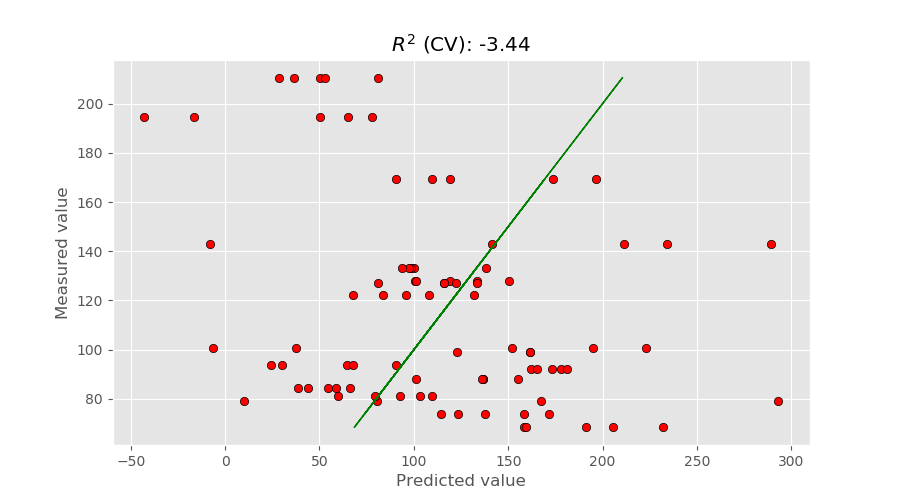

In [387]:
pls_simple = PLSRegression(n_components=13)
# Fit
pls_simple.fit(X, y)
# Cross-validation
y_cv_simple = cross_val_predict(pls_simple, X, y, cv=10)
# Calculate scores
score_simple = r2_score(y, y_cv_simple)
rmse_simple = np.sqrt(mean_squared_error(y, y_cv_simple))
# Fit a line to the CV vs response
# z = np.polyfit(y, y_cv_simple, 1)

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv_simple, y, c='red', edgecolors='k')
    #Plot the best fit line
    #ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1) 
    plt.title('$R^{2}$ (CV): %5.2f ' % score_simple)    
    plt.xlabel('Predicted value')
    plt.ylabel('Measured value')
    plt.show()

In [466]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(testX,y,test_size=0.2,random_state=0)

In [467]:
regressor=RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

F:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [468]:
regressor.score(X_test, y_test)

0.4581575563177024

<IPython.core.display.Javascript object>


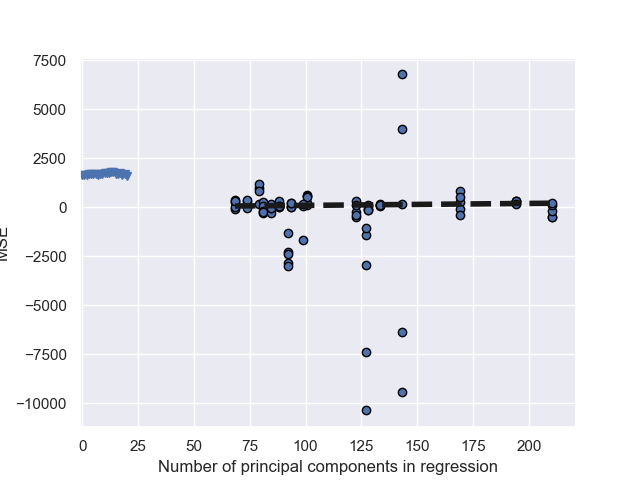

In [311]:
%matplotlib notebook
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)


plt.scatter(y, predicted, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

In [315]:
len(y)

87

In [338]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [339]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,-0.025839,-0.001901,-0.031831,-0.015592,0.007972,-0.065966
1,-0.025839,-0.005361,-0.031873,-0.010287,0.010694,-0.064477
2,-0.025826,-0.008581,-0.034555,-0.005301,0.017837,-0.063423
3,-0.025813,-0.011004,-0.038392,0.001929,0.021913,-0.061972
4,-0.025803,-0.012801,-0.043063,0.008379,0.023091,-0.058953


<IPython.core.display.Javascript object>


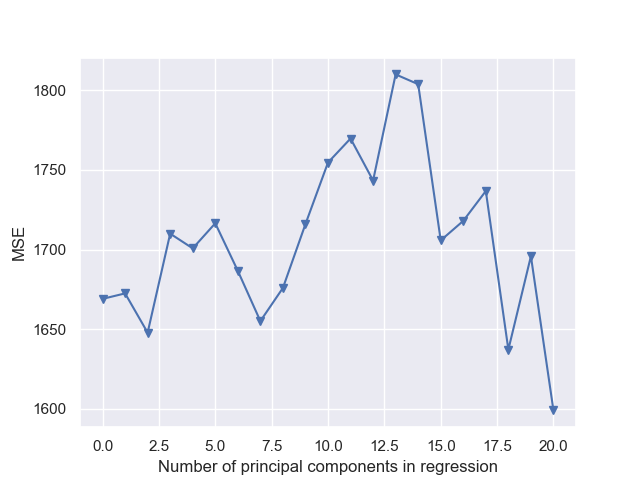

In [340]:
# 10-fold CV, with shuffle
%matplotlib notebook
n = len(X_reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 30 principle components, adding one component at the time.
for i in np.arange(1, 21):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('')
plt.xlim(left=-1);

<IPython.core.display.Javascript object>


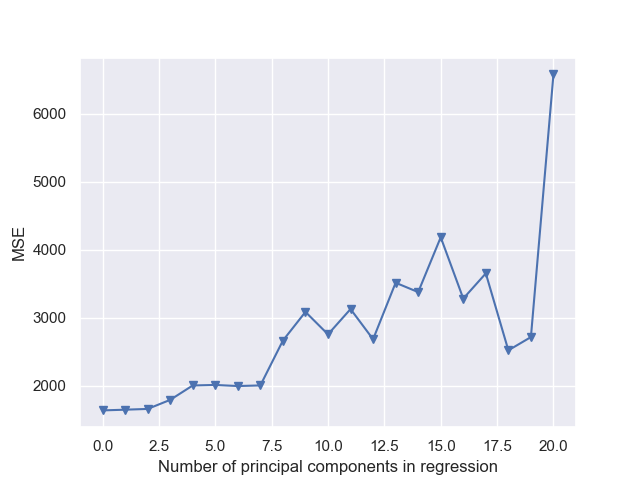

In [341]:
%matplotlib notebook
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=2, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 21):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('')
plt.xlim(left=-1);

In [333]:
# X_reduced_test = pca2.transform(scale(X_test))[:,:69]

# # Train regression model on training data 
# regr = LinearRegression()
# regr.fit(X_reduced_train[:,:69], y_train)

# # Prediction with test data
# pred = regr.predict(X_reduced_test)
# mean_squared_error(y_test, pred)

# PLS Regression

<class 'sklearn.cross_decomposition.pls_.PLSRegression'>


<IPython.core.display.Javascript object>


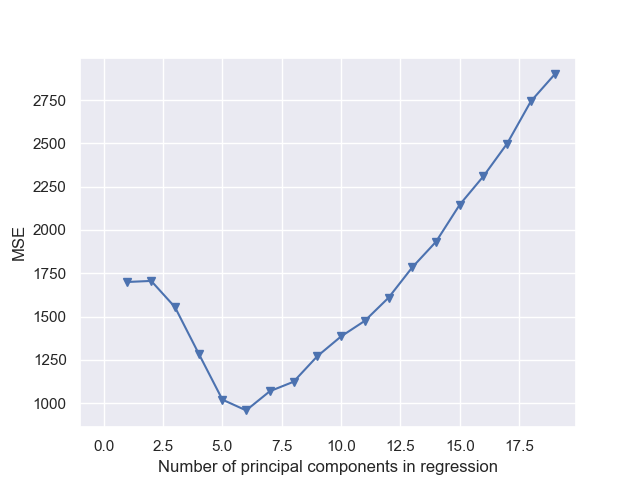

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


(-1, 19.9)

In [342]:
%matplotlib notebook
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)
print(type(pls))
# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('')
plt.xlim(xmin=-1)

In [343]:
%matplotlib notebook
# Define PLS object
pls = PLSRegression(n_components=5)
# Fit
pls.fit(X, y)

# Cross-validation
y_cv = cross_val_predict(pls, X, y, cv=10)
# Calculate scores

# Mean Squared Error 
mse1=np.square(np.subtract(y,y_cv))
MSE = mse1.mean() 
#print(mse1)
print(MSE)

7.920000000000000284e+01    3718.369119
dtype: float64


In [344]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):

    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''

    mse = []
    component = np.arange(1, n_comp)

    for i in component:
        pls = PLSRegression(n_components=i)

        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)

        mse.append(mean_squared_error(y, y_cv))

        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")

    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)

        plt.show()

    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)

    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)

    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()

    return

In [345]:
%matplotlib notebook

optimise_pls_cv(X,y, 30, plot_components=True)

75% completed
Suggested number of components:  1



<IPython.core.display.Javascript object>

R2 calib: 0.022
R2 CV: -0.171
MSE calib: 1620.284
MSE CV: 1940.553


TypeError: unsupported operand type(s) for -: 'str' and 'str'